### <span style='color:Blue'> Use package nsepy to extract P/E and P/B ratios from NSE website for broad market indices

In [1]:
#pip install nsepy matplotlib

I always like ignoring warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from nsepy import get_index_pe_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import numpy as np

1. User can add indices as per requirement in the symbol_list variable
2. User can edit the start_date variable as per requirement

In [13]:
symbol_list = ["NIFTY","NIFTY IT","NIFTY BANK","NIFTY FMCG","NIFTY AUTO","NIFTY OIL & GAS"]


start_date = date(2010,1,1)
end_date = date.today()

Create an empty data frame output to store the results from while loop used later

In [5]:
output = pd.DataFrame()


Define a function called pe_data

In [6]:
def pe_data():  
    for i in symbol_list:
        data = get_index_pe_history(symbol =  i ,
                                start= start_date,
                                end= end_date)
        data['Index'] = i
        global output
        output = output.append(data)
    return(output)

In [7]:
pe_data()

,P/E,P/B,Div Yield,Index
Date,,,,
2010-01-04,23.31,3.67,0.94,NIFTY
2010-01-05,23.57,3.71,0.93,NIFTY
2010-01-06,23.59,3.72,0.93,NIFTY
2010-01-07,23.51,3.70,0.93,NIFTY
2010-01-08,23.43,3.69,0.94,NIFTY
...,...,...,...,...
2022-07-19,8.71,2.03,3.85,NIFTY OIL & GAS
2022-07-20,8.80,2.05,3.81,NIFTY OIL & GAS
2022-07-21,8.89,2.07,3.77,NIFTY OIL & GAS


The nsepy api always does not return results as it times out. 
I put in a while loop to say that keep running the pe_data function until my length of input variable is equal to length of output variable.

In [8]:
if output.shape[0] == 0:
    output_length = 0
else:
    output_length = len(output['Index'].unique())

input_length = len(symbol_list)



In [9]:
start_time = time.time()

while output_length != input_length:
    pe_data()
    #print('No Result Yet')
    if output_length == input_length:
        current_time = time.time()
        elapsed_time = current_time - start_time
        print('Sucsess' + ' ' + str(elapsed_time) + 'seconds')
        break

Create a 252 long term average for P/E and P/B

In [10]:
output['Mean P/E'] = np.round(output.groupby('Index')['P/E'].transform(lambda x: x.rolling(252, 1).mean()),2)
output['Mean P/B'] = np.round(output.groupby('Index')['P/B'].transform(lambda x: x.rolling(252, 1).mean()),2)



P/E Plot

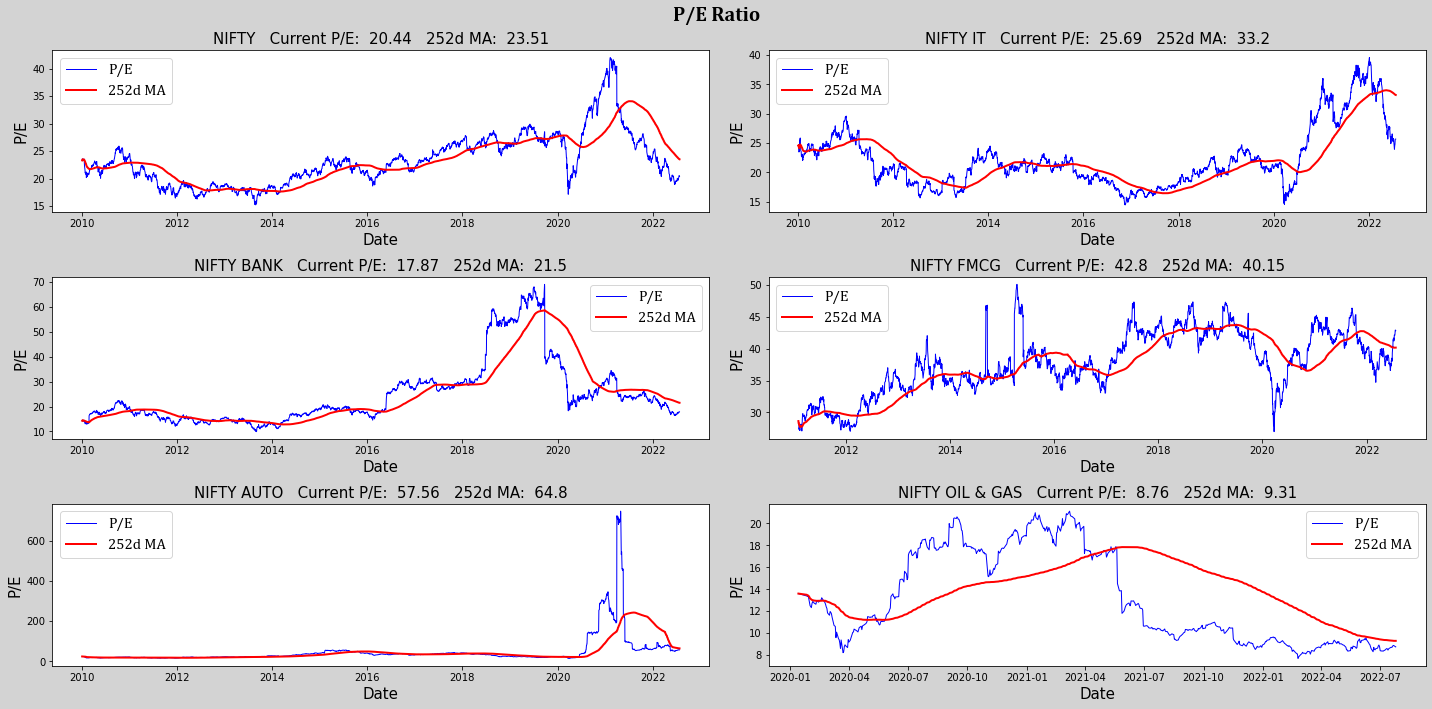

In [11]:
fig, axs = plt.subplots(nrows= math.ceil(len(symbol_list)/2), ncols=2,figsize = (20,10) ,facecolor= 'lightgray')
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rcParams["font.family"] = "Cambria"
fig.suptitle("P/E Ratio", fontsize=20 , color = 'black' , weight = 'bold')


ax = axs.ravel()

for symbol, i in zip(symbol_list, range(0,len(symbol_list))):
    y1 = output[output["Index"] == symbol]['P/E']
    y2 = output[output["Index"] == symbol]['Mean P/E']
    latest_value = output[output["Index"] == symbol]['P/E'].iloc[-1]
    latest_value_mean = output[output["Index"] == symbol]['Mean P/E'].iloc[-1]
    ax[i].plot(y1,color = 'blue' , linewidth = 1)
    ax[i].plot(y2,color = 'red' , linewidth = 2)
    ax[i].set_title(symbol + '   Current P/E:  ' + str(latest_value) +'   252d MA:  ' + str(latest_value_mean), fontsize = 15)
    ax[i].set_xlabel('Date', fontsize = 15)
    ax[i].set_ylabel('P/E', fontsize = 15)
    ax[i].legend(['P/E','252d MA'] , fontsize = 15)
    
fig.tight_layout()

P/B Plot

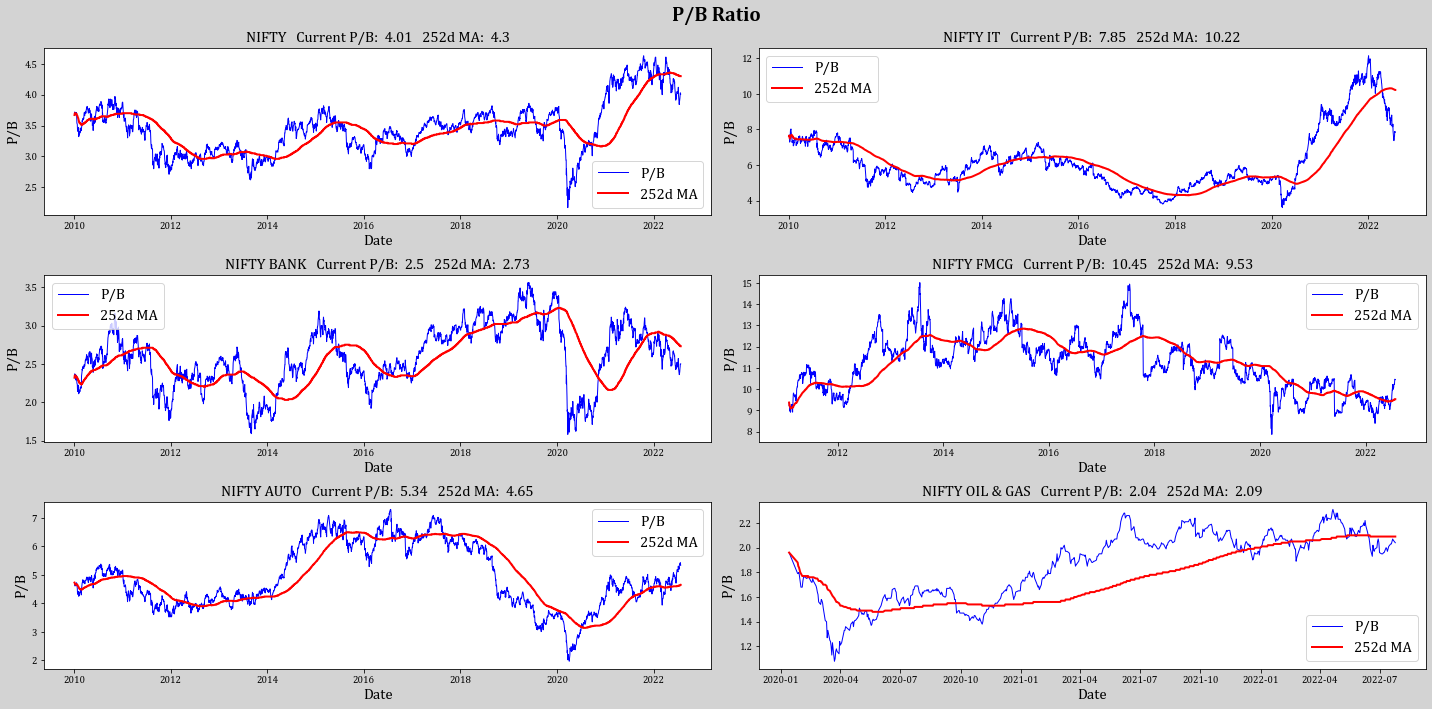

In [12]:
fig, axs = plt.subplots(nrows= math.ceil(len(symbol_list)/2), ncols=2,figsize = (20,10) ,facecolor= 'lightgray')
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rcParams["font.family"] = "Cambria"
fig.suptitle("P/B Ratio", fontsize=20 , color = 'black' , weight = 'bold')


ax = axs.ravel()

for symbol, i in zip(symbol_list, range(0,len(symbol_list))):
    y1 = output[output["Index"] == symbol]['P/B']
    y2 = output[output["Index"] == symbol]['Mean P/B']
    latest_value = output[output["Index"] == symbol]['P/B'].iloc[-1]
    latest_value_mean = output[output["Index"] == symbol]['Mean P/B'].iloc[-1]
    ax[i].plot(y1,color = 'blue' , linewidth = 1)
    ax[i].plot(y2,color = 'red' , linewidth = 2)
    ax[i].set_title(symbol + '   Current P/B:  ' + str(latest_value) +'   252d MA:  ' + str(latest_value_mean), fontsize = 15)
    ax[i].set_xlabel('Date', fontsize = 15)
    ax[i].set_ylabel('P/B', fontsize = 15)
    ax[i].legend(['P/B','252d MA'] , fontsize = 15)
    
fig.tight_layout()